# Multiple regression analysis sample

Obtain __each explanatory variable weight ($b_1,\;...\;,b_n$)__ and __intercept ($b_0$)__ by machine learning.

$$
    y = b_0 + b_1x_1 + b_2x_2 + … + b_nx_n
$$

## Ref

- StandardScaler
  - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#standardscaler
  - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


california = fetch_california_housing()

In [2]:
# Prepare dataset.
explanatory_feature_names = california.feature_names

df = pd.DataFrame(
    california.data,
    columns=explanatory_feature_names
)
df['Price'] = california.target

display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Split the data into Explanatory and Objective variables.
X = df[explanatory_feature_names]
y = df[['Price']]

display(X.head())
display(y.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [4]:
# Split dataset into training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

print(f'X_train length: {len(X_train)}')
display(X_train.head())
print(f'\nX_test length: {len(X_test)}')
display(X_test.head())

X_train length: 14448


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81



X_test length: 6192


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43


In [5]:
# Standard scaling data.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(
    X_train_scaled[:5],
    '\n\n',
    X_test_scaled[:5]
)

[[-1.00030408e+00  1.85620980e+00 -1.14682300e+00 -8.71975288e-01
  -1.07186955e+00  2.59828287e-01  5.13963868e-01 -1.11313968e-01]
 [-8.49386019e-01  1.14171192e+00 -7.65854761e-01  1.97334926e-01
  -5.12515556e-01 -3.27132332e-03  9.99934624e-01 -1.31738380e+00]
 [ 1.28620508e+00 -9.22393073e-01  4.61027223e-01 -1.51583971e-02
  -3.31935474e-02  1.12103925e-01 -8.22455710e-01  7.60843966e-01]
 [-1.13519966e+00 -9.22393073e-01 -1.27009952e+00  2.23585256e-01
   1.41434152e+00  1.52625950e-03 -7.33672591e-01  6.41233735e-01]
 [-8.70432056e-01  1.69743250e+00 -3.50004428e-01  1.47772127e-01
  -7.12595523e-01  8.56480538e-02  5.13963868e-01 -1.21281488e-01]] 

 [[ 0.15077666 -0.5254498   0.10477153 -0.04263662  0.10947217  0.16599986
  -1.42524636  1.25423617]
 [ 1.01154901  0.26843673  0.29893351 -0.3689475  -0.11235562 -0.00284492
  -0.79909173  0.79573028]
 [ 0.25489638  0.03027077  0.22177006 -0.15142947  0.11208191 -0.01898759
   1.41114065 -1.13298469]
 [-0.74854483  0.66538    -0

In [6]:
# Constructe Multiple regression model.
multi_regression = LinearRegression().fit(
    X_train_scaled,
    y_train
)

In [7]:
# Show predicted values.
y_train_predict = multi_regression.predict(X_train_scaled)
y_test_predict = multi_regression.predict(X_test_scaled)

print(f'y_train_predict: {len(y_train_predict)}\n{y_train_predict}\n')
print(f'y_test_predict: {len(y_test_predict)}\n{y_test_predict}')

y_train_predict: 14448
[[1.14308253]
 [1.99658954]
 [2.98998518]
 ...
 [2.51459646]
 [3.12664525]
 [0.47931856]]

y_test_predict: 6192
[[2.2702672 ]
 [2.79059912]
 [1.90984782]
 ...
 [3.56895295]
 [0.98163812]
 [2.72552317]]


In [8]:
def residual_plot(train_pred_y, train_y, test_pred_y, test_y) -> None:
    """Visualize difference between actual and predicted values using Residual plot.
    """
    plt.scatter(
        train_pred_y,
        train_pred_y - train_y,
        label='train'
    )
    plt.scatter(
        test_pred_y,
        test_pred_y - test_y,
        label='test'
    )
    plt.plot(
        [0, 10],
        [0, 0],
        color='red'
    )
    plt.xlabel('Predict')
    plt.ylabel('(Predict - True)')
    plt.title('Residual plot')
    plt.legend()
    plt.show()

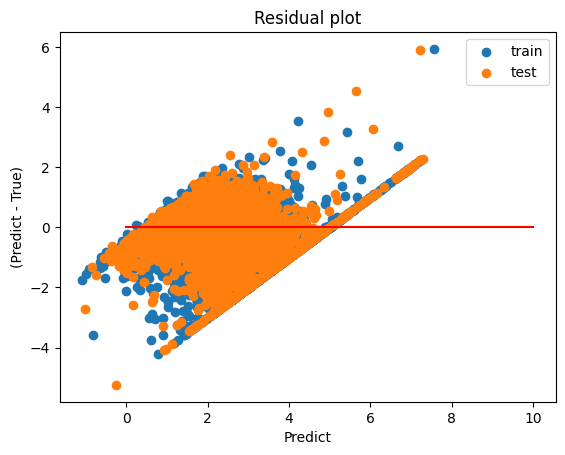

In [9]:
# Evaluate the model using Residual plot.
residual_plot(
    y_train_predict,
    y_train,
    y_test_predict,
    y_test
)

In [12]:
def _metrics_result_text(metrics: str, result: float) -> str:
    return f'{metrics} = {round(result, 4)}'


def accuracy_metrics_evaluation(y, y_pred, headline: str) -> None:
    mae: float = mean_absolute_error(y, y_pred)
    mse: float = mean_squared_error(y, y_pred)
    rmse: float = np.sqrt(mse)
    r2score: float = r2_score(y, y_pred)

    print(
        f'{headline}:\n' \
        f"{_metrics_result_text('MAE', mae)}\n" \
        f"{_metrics_result_text('MSE', mse)}\n" \
        f"{_metrics_result_text('RMSE', rmse)}\n" \
        f"{_metrics_result_text('R2', r2score)}"
    )

In [13]:
# Confirm accuracy assessment.
accuracy_metrics_evaluation(
    y_test,
    y_test_predict,
    'Test data Scores'
)

Test data Scores:
MAE = 0.5362
MSE = 0.5431
RMSE = 0.737
R2 = 0.5926


In [14]:
# Check for Overlearning tendencies.
accuracy_metrics_evaluation(
    y_train,
    y_train_predict,
    'Train data Scores'
)

Train data Scores:
MAE = 0.5293
MSE = 0.5173
RMSE = 0.7192
R2 = 0.6113


- __MAE__, __MSE__, and __RMSE__ all have smaller errors closer to 0.
- __R2 score__ takes values in the range of 0 to 1. The closer to 1, the higher the accuracy.

Therefore, we can say that the current multiple regression model is more accurate than the previous single regression model.
And, the results of executtion `accuracy_metrics_evaluation` test and train data also show NO particular tendency toward overlearning.